# Deep Radial Kernel Networks
<p></p>
## Brendan McCane and Lech Szymanski
<p></p>
### Department of Computer Science
### University of Otago
### Dunedin, New Zealand

In [33]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn.svm as svm
%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)
plt.rcParams["figure.figsize"] = [12,7]

import numpy.random as rand

# generate linear 2d data and plot
def gen_linear(num_points):
    X = rand.rand(num_points*2,2)
    y = np.array([1]*num_points+[2]*num_points)
    for i in xrange(num_points):
        X[i,1] = X[i,0]-0.4+rand.normal(scale=0.1)
        X[num_points+i,1] = X[num_points+i,0]+0.4+rand.normal(scale=0.1)
        
    return X, y

xlin, ylin = gen_linear(200)
# also create a mesh to do contour plots
# create a mesh to plot in
h = 0.02
x_min, x_max = xlin[:, 0].min() - 0.1, xlin[:, 0].max() + .1
y_min, y_max = xlin[:, 1].min() - .1, xlin[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))



# A simple problem

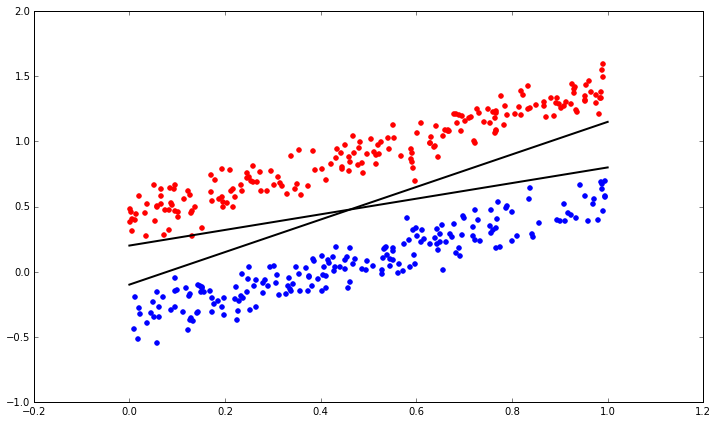

In [34]:
plt.scatter(xlin[:200,0],xlin[:200,1], color='blue')
plt.scatter(xlin[200:400,0], xlin[200:400,1], color='red')
plt.plot([0,1.0],[.2,0.8], color='black', lw=2)
plt.plot([0,1],[-.1,1.15], color='black', lw=2)

What's the best separating line?

# A shallow classifier

- Support Vector Machine (SVM)

$$f(y) = \sum_i \alpha_i K(x_i,y) > 0$$

- $K$ is some kernel function
- linear: 
$$K(x_i,y) = x_i \cdot y$$
- Gaussian: 
$$K(x_i,y) = e^{- \gamma |x_i - y|^2}$$

# A linear SVM

In [35]:
# generate linear svm
clf = svm.SVC(kernel='linear')
clf.fit(xlin, ylin)

# predict the class for each of the points in a grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

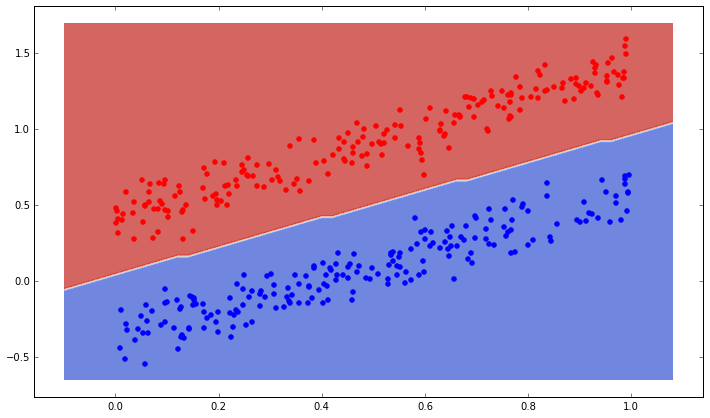

In [36]:
# plot the results as a shaded map
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(xlin[:200,0],xlin[:200,1], color='blue')
plt.scatter(xlin[200:400,0], xlin[200:400,1], color='red')

In [39]:
clf.predict([[0.6,0.7]])

array([2])

In [37]:
# let's try some more interesting data -  a spiral
num_data = 400
theta = np.linspace(0,4*math.pi,num_data)
theta = theta + rand.normal(size=num_data,scale=.1)
r = theta + rand.normal(size=num_data,scale=0.4)
xspiral = r*np.cos(theta)
yspiral = r*np.sin(theta)
xs2 = -r*np.cos(theta)
ys2 = -r*np.sin(theta)


blue = np.column_stack((xspiral,yspiral))
red = np.column_stack((xs2,ys2))
xspiral = np.row_stack((blue,red))
yspiral = np.array([1]*num_data+[2]*num_data)

x_min, x_max = xspiral[:, 0].min() - 0.1, xspiral[:, 0].max() + .1
y_min, y_max = xspiral[:, 1].min() - .1, xspiral[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# More interesting data

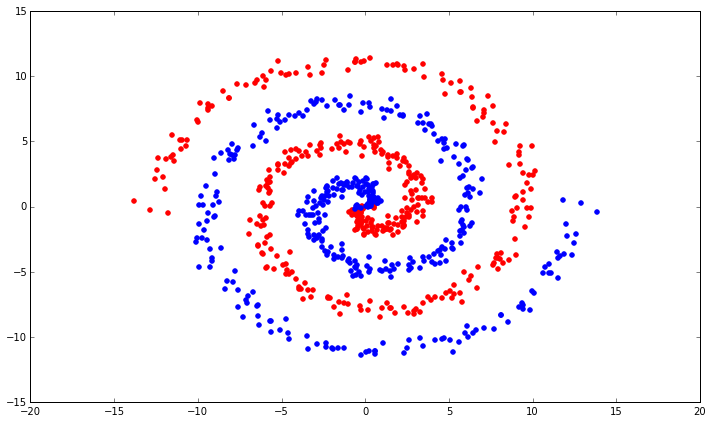

In [40]:
plt.scatter(red[:,0],red[:,1], color='red')
plt.scatter(blue[:,0],blue[:,1], color='blue')

# Linear SVM

In [42]:
# try a linear svm
# generate linear svm
clf = svm.SVC(kernel='linear')
clf.fit(xspiral, yspiral)

# predict the class for each of the points in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

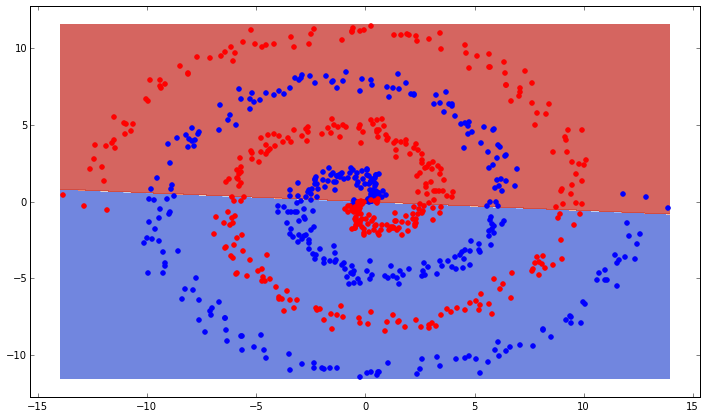

In [43]:
# plot the results as a shaded map
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(xspiral[:num_data,0],xspiral[:num_data,1], color='blue')
plt.scatter(xspiral[num_data:,0], xspiral[num_data:,1], color='red')

# Gaussian Kernel

In [51]:
# try a Gaussian kernel svm
clf = svm.SVC(kernel='rbf', gamma=0.1)

clf.fit(xspiral, yspiral)

# predict the class for each of the points in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

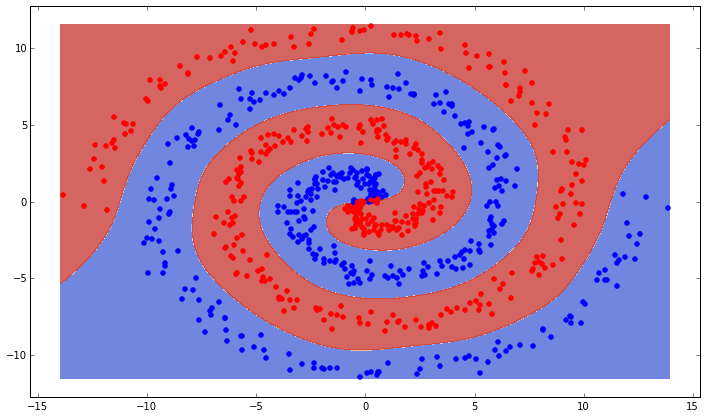

In [52]:
# plot the results as a shaded map
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(xspiral[:num_data,0],xspiral[:num_data,1], color='blue')
plt.scatter(xspiral[num_data:,0], xspiral[num_data:,1], color='red')